In [786]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [787]:
data = pd.read_csv('/Users/jorgepalacios/Desktop/Ironhack/amazon_reviews.csv')
data.head()

,Unnamed: 0,userName,verified,itemName,description,image,brand,feature,category,price,rating,reviewTime,summary,reviewText,vote
0,0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,2018-01-01,Five Stars,super smooth and yummy with crunchy bits,0
1,1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,2018-01-01,Five Stars,Perfect for kombucha,0
2,2,Matthew Daviskavitch,True,PetSafe Freedom Aluminum Patio Panel Sliding G...,"[""The Pet Safe Freedom Patio Panel Pet Door al...",['https://images-na.ssl-images-amazon.com/imag...,PetSafe,['PERFECT FOR RENTALS: Great for apartments or...,Pet_Supplies,$164.76,1.0,2018-01-01,One Star,"Came with parts missing (door cover, latch and...",0
3,3,H.L.,True,Vet Recommended Pet ID Tag Dog and Cat Persona...,['We offer extremely low cost pet ID tags that...,['https://images-na.ssl-images-amazon.com/imag...,Vet Recommended ID Tags,"['Large is Approx. 1.5"" | Small is Approx. 1""'...",Pet_Supplies,$2.75,5.0,2018-01-01,Five Stars,"Good for the price, ships quickly.",0
4,4,Dee,True,"Avery Removable Print or Write Labels, 1.5 x 3...",['Make a big statement with these Removable Pr...,[],Avery,['Removable labels stay only as long as you wa...,Office_Products,$6.53,1.0,2018-01-01,Doesnt stick,Entirely useless for me. Wont stick to plastic...,0


In [788]:
data.shape

(249608, 15)

In [789]:
data["vote"].value_counts(dropna = False)

0      235491
2        7207
3        2773
4        1527
5         773
        ...  
159         1
176         1
418         1
115         1
118         1
Name: vote, Length: 82, dtype: int64

In [790]:
data.isna().sum()

Unnamed: 0        0
userName         24
verified          0
itemName          0
description       1
image             0
brand          1278
feature           0
category          0
price             0
rating            0
reviewTime        0
summary           0
reviewText        0
vote              0
dtype: int64

In [791]:
# I will remove those rows with blank summary, itemName and reviewText 

data = data.dropna(subset = ['summary'])
data = data.dropna(subset = ['reviewText'])
data = data.dropna(subset = ['itemName'])
data = data.dropna(subset = ['price'])
data = data.drop(['Unnamed: 0'], axis = 1)
Unnamed: 0

In [792]:
data.isna().sum()

userName         24
verified          0
itemName          0
description       1
image             0
brand          1278
feature           0
category          0
price             0
rating            0
reviewTime        0
summary           0
reviewText        0
vote              0
dtype: int64

In [793]:
data.shape

(249608, 14)

In [794]:
data['userName'].value_counts(dropna = False)

Amazon Customer    20335
Kindle Customer     1217
Mike                 322
John                 262
Michael              245
                   ...  
Ernie Smith            1
K. Hunter              1
rlee                   1
Barbaral7722           1
Dody metzger           1
Name: userName, Length: 74217, dtype: int64

In [795]:
# We convert reviewTime to datetime format (currently as object)

data.dtypes

userName        object
verified          bool
itemName        object
description     object
image           object
brand           object
feature         object
category        object
price           object
rating         float64
reviewTime      object
summary         object
reviewText      object
vote             int64
dtype: object

In [796]:
import datetime
data['reviewTime'] =  pd.to_datetime(data['reviewTime'], format = '%Y-%m-%d')

In [797]:
# We can see that there are not reviews written in november and december

data['reviewTime'].unique()

array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
       '2018-01-05T00:00:00.000000000', '2018-01-06T00:00:00.000000000',
       '2018-01-07T00:00:00.000000000', '2018-01-08T00:00:00.000000000',
       '2018-01-09T00:00:00.000000000', '2018-01-10T00:00:00.000000000',
       '2018-01-11T00:00:00.000000000', '2018-01-12T00:00:00.000000000',
       '2018-01-13T00:00:00.000000000', '2018-01-14T00:00:00.000000000',
       '2018-01-15T00:00:00.000000000', '2018-01-16T00:00:00.000000000',
       '2018-01-17T00:00:00.000000000', '2018-01-18T00:00:00.000000000',
       '2018-01-19T00:00:00.000000000', '2018-01-20T00:00:00.000000000',
       '2018-01-21T00:00:00.000000000', '2018-01-22T00:00:00.000000000',
       '2018-01-23T00:00:00.000000000', '2018-01-24T00:00:00.000000000',
       '2018-01-25T00:00:00.000000000', '2018-01-26T00:00:00.000000000',
       '2018-01-27T00:00:00.000000000', '2018-01-28

In [798]:
data.dtypes

userName               object
verified                 bool
itemName               object
description            object
image                  object
brand                  object
feature                object
category               object
price                  object
rating                float64
reviewTime     datetime64[ns]
summary                object
reviewText             object
vote                    int64
dtype: object

In [799]:
# We are going to check if reviews are more likely to be voted if they are written on weekends.

def weekendornot(x):
    if x.weekday() < 5:
        return 0
    else: 
        return 1
    
data['weekend'] = data['reviewTime'].apply(weekendornot)

In [800]:
data['weekend'].unique()

array([0, 1])

In [801]:
dataweekend = data[['vote', 'weekend']]
corrweekend = data44.corr()
corrweekend

# Apparently, reviews are not much more likely to  be voted if they are written on weekends.

,vote,weekend
vote,1.000000,0.000903
weekend,0.000903,1.000000


In [802]:
# We are counting the numbers of images of each review. The more images has, the more value has that review.

def imagenumber(x):
    return len(x.split(","))

In [803]:
data['imagenumber'] = data['image'].apply(imagenumber)

In [804]:
data.head(4)

,userName,verified,itemName,description,image,brand,feature,category,price,rating,reviewTime,summary,reviewText,vote,weekend,imagenumber
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,2018-01-01,Five Stars,super smooth and yummy with crunchy bits,0,0,3
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,2018-01-01,Five Stars,Perfect for kombucha,0,0,2
2,Matthew Daviskavitch,True,PetSafe Freedom Aluminum Patio Panel Sliding G...,"[""The Pet Safe Freedom Patio Panel Pet Door al...",['https://images-na.ssl-images-amazon.com/imag...,PetSafe,['PERFECT FOR RENTALS: Great for apartments or...,Pet_Supplies,$164.76,1.0,2018-01-01,One Star,"Came with parts missing (door cover, latch and...",0,0,7
3,H.L.,True,Vet Recommended Pet ID Tag Dog and Cat Persona...,['We offer extremely low cost pet ID tags that...,['https://images-na.ssl-images-amazon.com/imag...,Vet Recommended ID Tags,"['Large is Approx. 1.5"" | Small is Approx. 1""'...",Pet_Supplies,$2.75,5.0,2018-01-01,Five Stars,"Good for the price, ships quickly.",0,0,5


In [805]:
# We are going to count the number of words of each review. 
# There exists a correlation between the voting of each review and the length.

data['reviewlength'] = data['reviewText'].apply(lambda x: len(x.split()))
data.head(4)

,userName,verified,itemName,description,image,brand,feature,category,price,rating,reviewTime,summary,reviewText,vote,weekend,imagenumber,reviewlength
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,2018-01-01,Five Stars,super smooth and yummy with crunchy bits,0,0,3,7
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,2018-01-01,Five Stars,Perfect for kombucha,0,0,2,3
2,Matthew Daviskavitch,True,PetSafe Freedom Aluminum Patio Panel Sliding G...,"[""The Pet Safe Freedom Patio Panel Pet Door al...",['https://images-na.ssl-images-amazon.com/imag...,PetSafe,['PERFECT FOR RENTALS: Great for apartments or...,Pet_Supplies,$164.76,1.0,2018-01-01,One Star,"Came with parts missing (door cover, latch and...",0,0,7,10
3,H.L.,True,Vet Recommended Pet ID Tag Dog and Cat Persona...,['We offer extremely low cost pet ID tags that...,['https://images-na.ssl-images-amazon.com/imag...,Vet Recommended ID Tags,"['Large is Approx. 1.5"" | Small is Approx. 1""'...",Pet_Supplies,$2.75,5.0,2018-01-01,Five Stars,"Good for the price, ships quickly.",0,0,5,6


In [806]:
# Now, we count the number of words of the summary

data['summarylength'] = data['summary'].apply(lambda x: len(x.split()))
data.head(4)

,userName,verified,itemName,description,image,brand,feature,category,price,rating,reviewTime,summary,reviewText,vote,weekend,imagenumber,reviewlength,summarylength
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,2018-01-01,Five Stars,super smooth and yummy with crunchy bits,0,0,3,7,2
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,2018-01-01,Five Stars,Perfect for kombucha,0,0,2,3,2
2,Matthew Daviskavitch,True,PetSafe Freedom Aluminum Patio Panel Sliding G...,"[""The Pet Safe Freedom Patio Panel Pet Door al...",['https://images-na.ssl-images-amazon.com/imag...,PetSafe,['PERFECT FOR RENTALS: Great for apartments or...,Pet_Supplies,$164.76,1.0,2018-01-01,One Star,"Came with parts missing (door cover, latch and...",0,0,7,10,2
3,H.L.,True,Vet Recommended Pet ID Tag Dog and Cat Persona...,['We offer extremely low cost pet ID tags that...,['https://images-na.ssl-images-amazon.com/imag...,Vet Recommended ID Tags,"['Large is Approx. 1.5"" | Small is Approx. 1""'...",Pet_Supplies,$2.75,5.0,2018-01-01,Five Stars,"Good for the price, ships quickly.",0,0,5,6,2


In [807]:
# Ratio of summary words to review words

data['ratiosumreview'] = data['summarylength']/data['reviewlength']
data.head()

,userName,verified,itemName,description,image,brand,feature,category,price,rating,reviewTime,summary,reviewText,vote,weekend,imagenumber,reviewlength,summarylength,ratiosumreview
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,2018-01-01,Five Stars,super smooth and yummy with crunchy bits,0,0,3,7,2,0.285714
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,2018-01-01,Five Stars,Perfect for kombucha,0,0,2,3,2,0.666667
2,Matthew Daviskavitch,True,PetSafe Freedom Aluminum Patio Panel Sliding G...,"[""The Pet Safe Freedom Patio Panel Pet Door al...",['https://images-na.ssl-images-amazon.com/imag...,PetSafe,['PERFECT FOR RENTALS: Great for apartments or...,Pet_Supplies,$164.76,1.0,2018-01-01,One Star,"Came with parts missing (door cover, latch and...",0,0,7,10,2,0.200000
3,H.L.,True,Vet Recommended Pet ID Tag Dog and Cat Persona...,['We offer extremely low cost pet ID tags that...,['https://images-na.ssl-images-amazon.com/imag...,Vet Recommended ID Tags,"['Large is Approx. 1.5"" | Small is Approx. 1""'...",Pet_Supplies,$2.75,5.0,2018-01-01,Five Stars,"Good for the price, ships quickly.",0,0,5,6,2,0.333333
4,Dee,True,"Avery Removable Print or Write Labels, 1.5 x 3...",['Make a big statement with these Removable Pr...,[],Avery,['Removable labels stay only as long as you wa...,Office_Products,$6.53,1.0,2018-01-01,Doesnt stick,Entirely useless for me. Wont stick to plastic...,0,0,1,10,2,0.200000


In [808]:
import re

def countsentence(x):
        sentences = re.split(r'[!?]+|(?<!\.)\.(?!\.)', x.replace('\n',''))
        return len(sentences)

data['sentencenumber'] = data['reviewText'].apply(countsentence)
data.head()


,userName,verified,itemName,description,image,brand,feature,category,price,rating,reviewTime,summary,reviewText,vote,weekend,imagenumber,reviewlength,summarylength,ratiosumreview,sentencenumber
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,2018-01-01,Five Stars,super smooth and yummy with crunchy bits,0,0,3,7,2,0.285714,1
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,2018-01-01,Five Stars,Perfect for kombucha,0,0,2,3,2,0.666667,1
2,Matthew Daviskavitch,True,PetSafe Freedom Aluminum Patio Panel Sliding G...,"[""The Pet Safe Freedom Patio Panel Pet Door al...",['https://images-na.ssl-images-amazon.com/imag...,PetSafe,['PERFECT FOR RENTALS: Great for apartments or...,Pet_Supplies,$164.76,1.0,2018-01-01,One Star,"Came with parts missing (door cover, latch and...",0,0,7,10,2,0.200000,2
3,H.L.,True,Vet Recommended Pet ID Tag Dog and Cat Persona...,['We offer extremely low cost pet ID tags that...,['https://images-na.ssl-images-amazon.com/imag...,Vet Recommended ID Tags,"['Large is Approx. 1.5"" | Small is Approx. 1""'...",Pet_Supplies,$2.75,5.0,2018-01-01,Five Stars,"Good for the price, ships quickly.",0,0,5,6,2,0.333333,2
4,Dee,True,"Avery Removable Print or Write Labels, 1.5 x 3...",['Make a big statement with these Removable Pr...,[],Avery,['Removable labels stay only as long as you wa...,Office_Products,$6.53,1.0,2018-01-01,Doesnt stick,Entirely useless for me. Wont stick to plastic...,0,0,1,10,2,0.200000,3


In [809]:
# Counting the number of characters of each review

def countspecialchar(x):
    text_length = len(re.sub('[A-Za-z0-9\s]+', '', x))
    return text_length

data['specialchar'] = data['reviewText'].apply(countspecialchar)
data.head()

,userName,verified,itemName,description,image,brand,feature,category,price,rating,...,summary,reviewText,vote,weekend,imagenumber,reviewlength,summarylength,ratiosumreview,sentencenumber,specialchar
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,...,Five Stars,super smooth and yummy with crunchy bits,0,0,3,7,2,0.285714,1,0
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,...,Five Stars,Perfect for kombucha,0,0,2,3,2,0.666667,1,0
2,Matthew Daviskavitch,True,PetSafe Freedom Aluminum Patio Panel Sliding G...,"[""The Pet Safe Freedom Patio Panel Pet Door al...",['https://images-na.ssl-images-amazon.com/imag...,PetSafe,['PERFECT FOR RENTALS: Great for apartments or...,Pet_Supplies,$164.76,1.0,...,One Star,"Came with parts missing (door cover, latch and...",0,0,7,10,2,0.200000,2,4
3,H.L.,True,Vet Recommended Pet ID Tag Dog and Cat Persona...,['We offer extremely low cost pet ID tags that...,['https://images-na.ssl-images-amazon.com/imag...,Vet Recommended ID Tags,"['Large is Approx. 1.5"" | Small is Approx. 1""'...",Pet_Supplies,$2.75,5.0,...,Five Stars,"Good for the price, ships quickly.",0,0,5,6,2,0.333333,2,2
4,Dee,True,"Avery Removable Print or Write Labels, 1.5 x 3...",['Make a big statement with these Removable Pr...,[],Avery,['Removable labels stay only as long as you wa...,Office_Products,$6.53,1.0,...,Doesnt stick,Entirely useless for me. Wont stick to plastic...,0,0,1,10,2,0.200000,3,2


In [810]:
# ARI of each review

def ARI(text):
    score = 0.0 
    if len(text) > 100:
        score = 4.71 * (len(text) / len(text.split()) ) +  0.5 * ( len(text.split()) / len(text.split('.'))) - 21.43 
        return score
    else:
        return 0


In [811]:
data['ari'] = data['reviewText'].apply(ARI)
data.head()

,userName,verified,itemName,description,image,brand,feature,category,price,rating,...,reviewText,vote,weekend,imagenumber,reviewlength,summarylength,ratiosumreview,sentencenumber,specialchar,ari
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,...,super smooth and yummy with crunchy bits,0,0,3,7,2,0.285714,1,0,0.0
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,...,Perfect for kombucha,0,0,2,3,2,0.666667,1,0,0.0
2,Matthew Daviskavitch,True,PetSafe Freedom Aluminum Patio Panel Sliding G...,"[""The Pet Safe Freedom Patio Panel Pet Door al...",['https://images-na.ssl-images-amazon.com/imag...,PetSafe,['PERFECT FOR RENTALS: Great for apartments or...,Pet_Supplies,$164.76,1.0,...,"Came with parts missing (door cover, latch and...",0,0,7,10,2,0.200000,2,4,0.0
3,H.L.,True,Vet Recommended Pet ID Tag Dog and Cat Persona...,['We offer extremely low cost pet ID tags that...,['https://images-na.ssl-images-amazon.com/imag...,Vet Recommended ID Tags,"['Large is Approx. 1.5"" | Small is Approx. 1""'...",Pet_Supplies,$2.75,5.0,...,"Good for the price, ships quickly.",0,0,5,6,2,0.333333,2,2,0.0
4,Dee,True,"Avery Removable Print or Write Labels, 1.5 x 3...",['Make a big statement with these Removable Pr...,[],Avery,['Removable labels stay only as long as you wa...,Office_Products,$6.53,1.0,...,Entirely useless for me. Wont stick to plastic...,0,0,1,10,2,0.200000,3,2,0.0


In [812]:
# Flesch reading ease: The idea is to calculate the average length of the sentences and the average lenght of syllabes.
# This is a way to calculate the reading ease.

In [813]:
def FleschReadabilityEase(text):
    if len(text) > 100:
        return 206.835 - (1.015 * len(text.split()) / len(text.split('.')) ) - 84.6 * (sum(list(map(lambda x: 1 if x in ["a","i","e","o","u","y","A","E","I","O","U","y"] else 0,text))) / len(text.split()))
    else: 
        return 0

In [814]:
data['flesch'] = data['reviewText'].apply(FleschReadabilityEase)
data.head()

,userName,verified,itemName,description,image,brand,feature,category,price,rating,...,vote,weekend,imagenumber,reviewlength,summarylength,ratiosumreview,sentencenumber,specialchar,ari,flesch
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,...,0,0,3,7,2,0.285714,1,0,0.0,0.0
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,...,0,0,2,3,2,0.666667,1,0,0.0,0.0
2,Matthew Daviskavitch,True,PetSafe Freedom Aluminum Patio Panel Sliding G...,"[""The Pet Safe Freedom Patio Panel Pet Door al...",['https://images-na.ssl-images-amazon.com/imag...,PetSafe,['PERFECT FOR RENTALS: Great for apartments or...,Pet_Supplies,$164.76,1.0,...,0,0,7,10,2,0.200000,2,4,0.0,0.0
3,H.L.,True,Vet Recommended Pet ID Tag Dog and Cat Persona...,['We offer extremely low cost pet ID tags that...,['https://images-na.ssl-images-amazon.com/imag...,Vet Recommended ID Tags,"['Large is Approx. 1.5"" | Small is Approx. 1""'...",Pet_Supplies,$2.75,5.0,...,0,0,5,6,2,0.333333,2,2,0.0,0.0
4,Dee,True,"Avery Removable Print or Write Labels, 1.5 x 3...",['Make a big statement with these Removable Pr...,[],Avery,['Removable labels stay only as long as you wa...,Office_Products,$6.53,1.0,...,0,0,1,10,2,0.200000,3,2,0.0,0.0


In [815]:
def FleschKincaidTest(text):
    score = 0.0
    if len(text) > 100:
        score = (0.39 * len(text.split()) / len(text.split('.'))) + 11.8 * (sum(list(map(lambda x: 1 if x in ["a","i","e","o","u","y","A","E","I","O","U","y"] else 0,text))) / len(text.split())) - 15.59
        return score if score > 0 else 0
    else:
        return 0

In [816]:
data['fleschkincaid'] = data['reviewText'].apply(FleschKincaidTest)
data.head()

,userName,verified,itemName,description,image,brand,feature,category,price,rating,...,weekend,imagenumber,reviewlength,summarylength,ratiosumreview,sentencenumber,specialchar,ari,flesch,fleschkincaid
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,...,0,3,7,2,0.285714,1,0,0.0,0.0,0.0
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,...,0,2,3,2,0.666667,1,0,0.0,0.0,0.0
2,Matthew Daviskavitch,True,PetSafe Freedom Aluminum Patio Panel Sliding G...,"[""The Pet Safe Freedom Patio Panel Pet Door al...",['https://images-na.ssl-images-amazon.com/imag...,PetSafe,['PERFECT FOR RENTALS: Great for apartments or...,Pet_Supplies,$164.76,1.0,...,0,7,10,2,0.200000,2,4,0.0,0.0,0.0
3,H.L.,True,Vet Recommended Pet ID Tag Dog and Cat Persona...,['We offer extremely low cost pet ID tags that...,['https://images-na.ssl-images-amazon.com/imag...,Vet Recommended ID Tags,"['Large is Approx. 1.5"" | Small is Approx. 1""'...",Pet_Supplies,$2.75,5.0,...,0,5,6,2,0.333333,2,2,0.0,0.0,0.0
4,Dee,True,"Avery Removable Print or Write Labels, 1.5 x 3...",['Make a big statement with these Removable Pr...,[],Avery,['Removable labels stay only as long as you wa...,Office_Products,$6.53,1.0,...,0,1,10,2,0.200000,3,2,0.0,0.0,0.0


In [817]:
# Number of uppercase letters in a review

def uppercase(x):
    stri_up = 0
    for i in x:
        if i.isupper() == True:
            stri_up += 1
    return stri_up

In [818]:
data['uppercase'] = data['reviewText'].apply(uppercase)
data.head()

,userName,verified,itemName,description,image,brand,feature,category,price,rating,...,imagenumber,reviewlength,summarylength,ratiosumreview,sentencenumber,specialchar,ari,flesch,fleschkincaid,uppercase
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,...,3,7,2,0.285714,1,0,0.0,0.0,0.0,0
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,...,2,3,2,0.666667,1,0,0.0,0.0,0.0,1
2,Matthew Daviskavitch,True,PetSafe Freedom Aluminum Patio Panel Sliding G...,"[""The Pet Safe Freedom Patio Panel Pet Door al...",['https://images-na.ssl-images-amazon.com/imag...,PetSafe,['PERFECT FOR RENTALS: Great for apartments or...,Pet_Supplies,$164.76,1.0,...,7,10,2,0.200000,2,4,0.0,0.0,0.0,1
3,H.L.,True,Vet Recommended Pet ID Tag Dog and Cat Persona...,['We offer extremely low cost pet ID tags that...,['https://images-na.ssl-images-amazon.com/imag...,Vet Recommended ID Tags,"['Large is Approx. 1.5"" | Small is Approx. 1""'...",Pet_Supplies,$2.75,5.0,...,5,6,2,0.333333,2,2,0.0,0.0,0.0,1
4,Dee,True,"Avery Removable Print or Write Labels, 1.5 x 3...",['Make a big statement with these Removable Pr...,[],Avery,['Removable labels stay only as long as you wa...,Office_Products,$6.53,1.0,...,1,10,2,0.200000,3,2,0.0,0.0,0.0,2


In [819]:
def verification(x):
    if x == True:
        return 1
    elif x == False:
        return 0
    
data['verification'] = data['verified'].apply(verification)
data.head()

,userName,verified,itemName,description,image,brand,feature,category,price,rating,...,reviewlength,summarylength,ratiosumreview,sentencenumber,specialchar,ari,flesch,fleschkincaid,uppercase,verification
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,...,7,2,0.285714,1,0,0.0,0.0,0.0,0,1
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,...,3,2,0.666667,1,0,0.0,0.0,0.0,1,1
2,Matthew Daviskavitch,True,PetSafe Freedom Aluminum Patio Panel Sliding G...,"[""The Pet Safe Freedom Patio Panel Pet Door al...",['https://images-na.ssl-images-amazon.com/imag...,PetSafe,['PERFECT FOR RENTALS: Great for apartments or...,Pet_Supplies,$164.76,1.0,...,10,2,0.200000,2,4,0.0,0.0,0.0,1,1
3,H.L.,True,Vet Recommended Pet ID Tag Dog and Cat Persona...,['We offer extremely low cost pet ID tags that...,['https://images-na.ssl-images-amazon.com/imag...,Vet Recommended ID Tags,"['Large is Approx. 1.5"" | Small is Approx. 1""'...",Pet_Supplies,$2.75,5.0,...,6,2,0.333333,2,2,0.0,0.0,0.0,1,1
4,Dee,True,"Avery Removable Print or Write Labels, 1.5 x 3...",['Make a big statement with these Removable Pr...,[],Avery,['Removable labels stay only as long as you wa...,Office_Products,$6.53,1.0,...,10,2,0.200000,3,2,0.0,0.0,0.0,2,1


In [820]:
# Polarity of each review: 0 indicates neutral, 1 a very positive sentiment and -1 a very negative.

In [821]:
from textblob import TextBlob

def polarity(x):
    return TextBlob(x).sentiment.polarity

data['polarity'] = data['reviewText'].apply(polarity)
data.head()

,userName,verified,itemName,description,image,brand,feature,category,price,rating,...,summarylength,ratiosumreview,sentencenumber,specialchar,ari,flesch,fleschkincaid,uppercase,verification,polarity
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,...,2,0.285714,1,0,0.0,0.0,0.0,0,1,0.366667
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,...,2,0.666667,1,0,0.0,0.0,0.0,1,1,1.000000
2,Matthew Daviskavitch,True,PetSafe Freedom Aluminum Patio Panel Sliding G...,"[""The Pet Safe Freedom Patio Panel Pet Door al...",['https://images-na.ssl-images-amazon.com/imag...,PetSafe,['PERFECT FOR RENTALS: Great for apartments or...,Pet_Supplies,$164.76,1.0,...,2,0.200000,2,4,0.0,0.0,0.0,1,1,-0.200000
3,H.L.,True,Vet Recommended Pet ID Tag Dog and Cat Persona...,['We offer extremely low cost pet ID tags that...,['https://images-na.ssl-images-amazon.com/imag...,Vet Recommended ID Tags,"['Large is Approx. 1.5"" | Small is Approx. 1""'...",Pet_Supplies,$2.75,5.0,...,2,0.333333,2,2,0.0,0.0,0.0,1,1,0.516667
4,Dee,True,"Avery Removable Print or Write Labels, 1.5 x 3...",['Make a big statement with these Removable Pr...,[],Avery,['Removable labels stay only as long as you wa...,Office_Products,$6.53,1.0,...,2,0.200000,3,2,0.0,0.0,0.0,2,1,-0.500000


In [822]:
# Subjectivity: range from 0 to 1, where 0 indicates great objectivity and 1 great subjectivity.

In [823]:
from textblob import TextBlob

def subjectivity(x):
    return TextBlob(x).sentiment.subjectivity

data['subjectivity'] = data['reviewText'].apply(subjectivity)
data.head()

,userName,verified,itemName,description,image,brand,feature,category,price,rating,...,ratiosumreview,sentencenumber,specialchar,ari,flesch,fleschkincaid,uppercase,verification,polarity,subjectivity
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,...,0.285714,1,0,0.0,0.0,0.0,0,1,0.366667,0.583333
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,...,0.666667,1,0,0.0,0.0,0.0,1,1,1.000000,1.000000
2,Matthew Daviskavitch,True,PetSafe Freedom Aluminum Patio Panel Sliding G...,"[""The Pet Safe Freedom Patio Panel Pet Door al...",['https://images-na.ssl-images-amazon.com/imag...,PetSafe,['PERFECT FOR RENTALS: Great for apartments or...,Pet_Supplies,$164.76,1.0,...,0.200000,2,4,0.0,0.0,0.0,1,1,-0.200000,0.050000
3,H.L.,True,Vet Recommended Pet ID Tag Dog and Cat Persona...,['We offer extremely low cost pet ID tags that...,['https://images-na.ssl-images-amazon.com/imag...,Vet Recommended ID Tags,"['Large is Approx. 1.5"" | Small is Approx. 1""'...",Pet_Supplies,$2.75,5.0,...,0.333333,2,2,0.0,0.0,0.0,1,1,0.516667,0.550000
4,Dee,True,"Avery Removable Print or Write Labels, 1.5 x 3...",['Make a big statement with these Removable Pr...,[],Avery,['Removable labels stay only as long as you wa...,Office_Products,$6.53,1.0,...,0.200000,3,2,0.0,0.0,0.0,2,1,-0.500000,0.200000


In [824]:
def useful(x): 
    if x == 0: 
        return 0
    else:
        return 1
    
data['usefulness'] = data['vote'].apply(useful)
data.head()

,userName,verified,itemName,description,image,brand,feature,category,price,rating,...,sentencenumber,specialchar,ari,flesch,fleschkincaid,uppercase,verification,polarity,subjectivity,usefulness
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,...,1,0,0.0,0.0,0.0,0,1,0.366667,0.583333,0
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,...,1,0,0.0,0.0,0.0,1,1,1.000000,1.000000,0
2,Matthew Daviskavitch,True,PetSafe Freedom Aluminum Patio Panel Sliding G...,"[""The Pet Safe Freedom Patio Panel Pet Door al...",['https://images-na.ssl-images-amazon.com/imag...,PetSafe,['PERFECT FOR RENTALS: Great for apartments or...,Pet_Supplies,$164.76,1.0,...,2,4,0.0,0.0,0.0,1,1,-0.200000,0.050000,0
3,H.L.,True,Vet Recommended Pet ID Tag Dog and Cat Persona...,['We offer extremely low cost pet ID tags that...,['https://images-na.ssl-images-amazon.com/imag...,Vet Recommended ID Tags,"['Large is Approx. 1.5"" | Small is Approx. 1""'...",Pet_Supplies,$2.75,5.0,...,2,2,0.0,0.0,0.0,1,1,0.516667,0.550000,0
4,Dee,True,"Avery Removable Print or Write Labels, 1.5 x 3...",['Make a big statement with these Removable Pr...,[],Avery,['Removable labels stay only as long as you wa...,Office_Products,$6.53,1.0,...,3,2,0.0,0.0,0.0,2,1,-0.500000,0.200000,0


In [825]:
data.shape

(249608, 29)

In [826]:
data['usefulness'].value_counts()

0    235491
1     14117
Name: usefulness, dtype: int64

In [827]:
y = pd.DataFrame(data['usefulness'])
X = pd.DataFrame(data.drop(['userName', 'verified', 'itemName', 'description', 'image', 'brand', 'feature', 'price', 'rating', 'category','reviewTime', 'summary', 'reviewText', 'vote', 'usefulness'], axis = 1))

In [828]:
X

,weekend,imagenumber,reviewlength,summarylength,ratiosumreview,sentencenumber,specialchar,ari,flesch,fleschkincaid,uppercase,verification,polarity,subjectivity
0,0,3,7,2,0.285714,1,0,0.0,0.0,0.0,0,1,0.366667,0.583333
1,0,2,3,2,0.666667,1,0,0.0,0.0,0.0,1,1,1.000000,1.000000
2,0,7,10,2,0.200000,2,4,0.0,0.0,0.0,1,1,-0.200000,0.050000
3,0,5,6,2,0.333333,2,2,0.0,0.0,0.0,1,1,0.516667,0.550000
4,0,1,10,2,0.200000,3,2,0.0,0.0,0.0,2,1,-0.500000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249603,0,34,1,1,1.000000,1,0,0.0,0.0,0.0,1,1,0.000000,0.000000
249604,0,6,5,2,0.400000,1,0,0.0,0.0,0.0,1,1,0.700000,0.600000
249605,0,21,5,2,0.400000,2,1,0.0,0.0,0.0,1,1,0.012500,0.662500
249606,0,5,3,4,1.333333,1,0,0.0,0.0,0.0,1,1,0.800000,0.750000


In [829]:
# Normalization through MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

X_normalized = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
X_normalized

,weekend,imagenumber,reviewlength,summarylength,ratiosumreview,sentencenumber,specialchar,ari,flesch,fleschkincaid,uppercase,verification,polarity,subjectivity
0,0.0,0.016,0.002401,0.048780,0.011905,0.000000,0.000000,0.0,0.764553,0.0,0.000000,1.0,0.683333,0.583333
1,0.0,0.008,0.000800,0.048780,0.027778,0.000000,0.000000,0.0,0.764553,0.0,0.001541,1.0,1.000000,1.000000
2,0.0,0.048,0.003601,0.048780,0.008333,0.009259,0.002660,0.0,0.764553,0.0,0.001541,1.0,0.400000,0.050000
3,0.0,0.032,0.002001,0.048780,0.013889,0.009259,0.001330,0.0,0.764553,0.0,0.001541,1.0,0.758333,0.550000
4,0.0,0.000,0.003601,0.048780,0.008333,0.018519,0.001330,0.0,0.764553,0.0,0.003082,1.0,0.250000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249603,0.0,0.264,0.000000,0.024390,0.041667,0.000000,0.000000,0.0,0.764553,0.0,0.001541,1.0,0.500000,0.000000
249604,0.0,0.040,0.001601,0.048780,0.016667,0.000000,0.000000,0.0,0.764553,0.0,0.001541,1.0,0.850000,0.600000
249605,0.0,0.160,0.001601,0.048780,0.016667,0.009259,0.000665,0.0,0.764553,0.0,0.001541,1.0,0.506250,0.662500
249606,0.0,0.032,0.000800,0.097561,0.055556,0.000000,0.000000,0.0,0.764553,0.0,0.001541,1.0,0.900000,0.750000


In [830]:
y.value_counts()

usefulness
0             235491
1              14117
dtype: int64

In [831]:
datanormalized = pd.concat([X_normalized, y], axis = 1)
datanormalized

datanormalized['flesch'].unique

,weekend,imagenumber,reviewlength,summarylength,ratiosumreview,sentencenumber,specialchar,ari,flesch,fleschkincaid,uppercase,verification,polarity,subjectivity,usefulness
0,0.0,0.016,0.002401,0.048780,0.011905,0.000000,0.000000,0.0,0.764553,0.0,0.000000,1.0,0.683333,0.583333,0
1,0.0,0.008,0.000800,0.048780,0.027778,0.000000,0.000000,0.0,0.764553,0.0,0.001541,1.0,1.000000,1.000000,0
2,0.0,0.048,0.003601,0.048780,0.008333,0.009259,0.002660,0.0,0.764553,0.0,0.001541,1.0,0.400000,0.050000,0
3,0.0,0.032,0.002001,0.048780,0.013889,0.009259,0.001330,0.0,0.764553,0.0,0.001541,1.0,0.758333,0.550000,0
4,0.0,0.000,0.003601,0.048780,0.008333,0.018519,0.001330,0.0,0.764553,0.0,0.003082,1.0,0.250000,0.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249603,0.0,0.264,0.000000,0.024390,0.041667,0.000000,0.000000,0.0,0.764553,0.0,0.001541,1.0,0.500000,0.000000,0
249604,0.0,0.040,0.001601,0.048780,0.016667,0.000000,0.000000,0.0,0.764553,0.0,0.001541,1.0,0.850000,0.600000,0
249605,0.0,0.160,0.001601,0.048780,0.016667,0.009259,0.000665,0.0,0.764553,0.0,0.001541,1.0,0.506250,0.662500,0
249606,0.0,0.032,0.000800,0.097561,0.055556,0.000000,0.000000,0.0,0.764553,0.0,0.001541,1.0,0.900000,0.750000,0


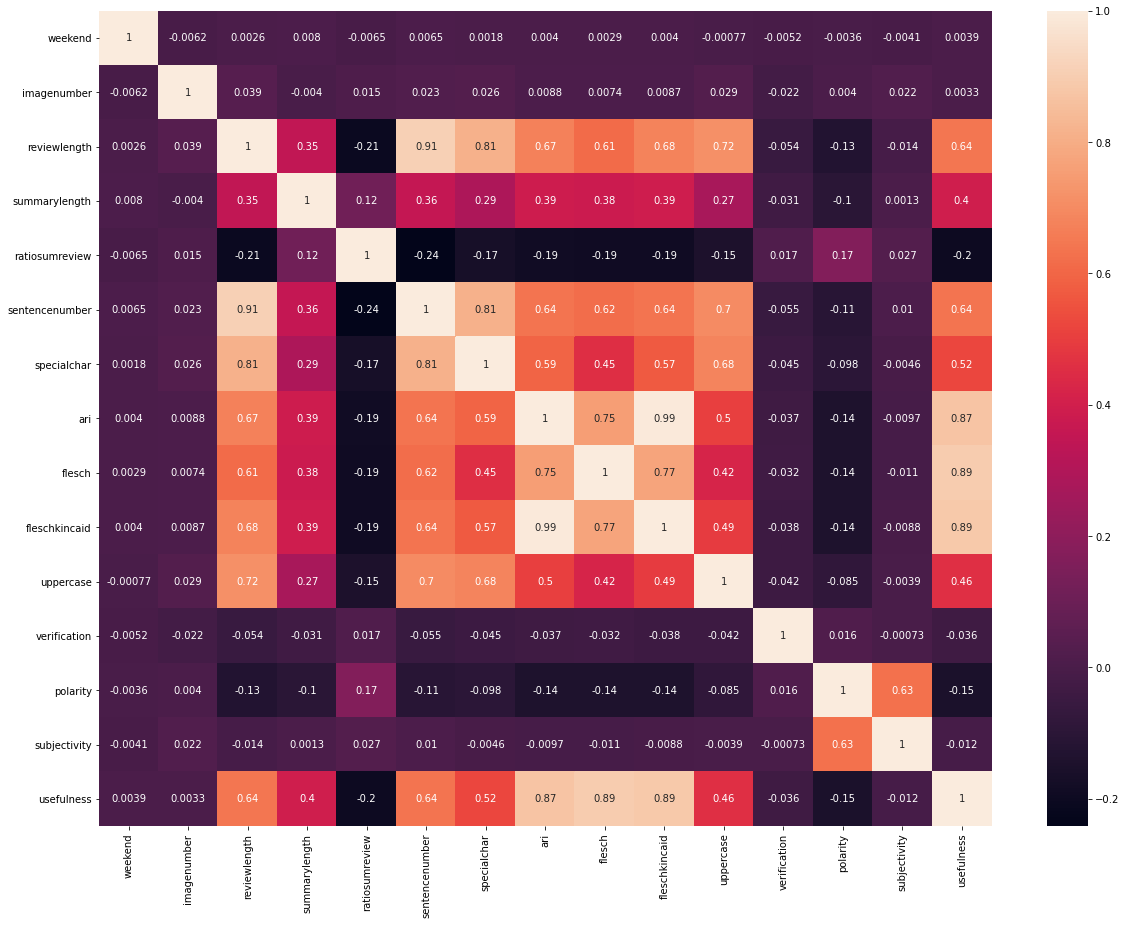

In [832]:
# I'm going to check the correlation between variables and correlation with my target. 

corr = datanormalized.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot = True)
plt.show()

# I'm going to drop ari and fleschkincaid due to the big dependence with flesch.
# Sentencenumber and specialchar are also going to be dropped, due to the dependence with reviewlength

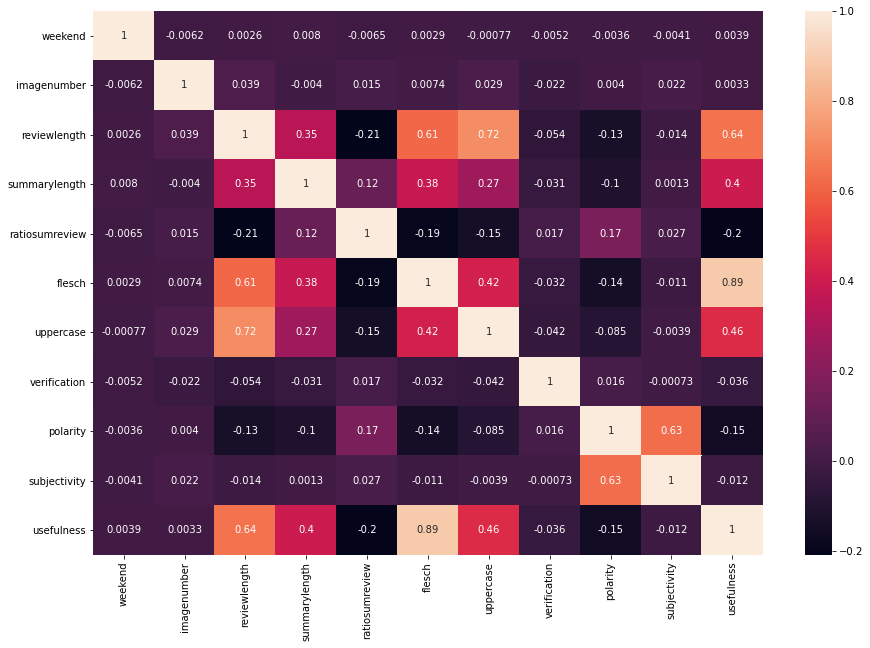

In [833]:
data = datanormalized.drop(columns = ['ari', 'fleschkincaid', 'sentencenumber', 'specialchar'])

corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)
plt.show()



In [834]:
# Conversion of X_normalized to X again, and remove of features

X = X_normalized.drop(columns=['ari', 'fleschkincaid', 'sentencenumber', 'specialchar'], axis = 1)

In [836]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20, verbose = False)
rfe.fit(X, y)

/Users/jorgepalacios/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RFE(estimator=LogisticRegression(), n_features_to_select=20, verbose=False)

In [837]:
# After we run the algorithm, it labels the top features as 1 and the rest are marked in an increasing order of importance.
df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = pd.DataFrame(X).columns
df[df['Rank']==1]
#df['Rank'].value_counts()

,Rank,Column_name
0,1,weekend
1,1,imagenumber
2,1,reviewlength
3,1,summarylength
4,1,ratiosumreview
5,1,flesch
6,1,uppercase
7,1,verification
8,1,polarity
9,1,subjectivity


In [838]:
#Dealing with Imbalanced Data --> Synthetic Minority Oversampling TEchnique (SMOTE)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [839]:
sm = SMOTE(random_state=100,sampling_strategy=0.4,k_neighbors=5)
X_SMOTE,y_SMOTE = sm.fit_sample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.25, random_state=100)

In [840]:
y_test.value_counts()

usefulness
0             58932
1             23490
dtype: int64

In [841]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [842]:
#Logistic regression:

classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)
classification.score(X_test, y_test)

/Users/jorgepalacios/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/jorgepalacios/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.969680425129213

In [843]:
# Random Forest Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

clf = RandomForestRegressor(max_depth=15,
                             criterion = 'mse',
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_features = 3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

<ipython-input-843-0f4eb2c38e74>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


0.9520637857003881

In [844]:
# Decision Tree Regressor

regr = DecisionTreeRegressor(max_depth=15,
                             criterion = 'mse',
                             min_samples_split=20,
                             min_samples_leaf = 20,
                             max_features = 3)

model = regr.fit(X_train, y_train)
regr.score(X_train, y_train)


0.9474163269905304

In [845]:
# GradientBoosting Regressor

from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(X_train,y_train)
GB.score(X_test,y_test)

/Users/jorgepalacios/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.954855478057009